# Label Mapping Analysis

This notebook analyzes the correlation between various NER models (CyNER, SecureBERT) and DNRTI labels to verify if labels should map to multiple DNRTI labels.

The heavy lifting (running the model on 2000 sentences) was done in `analyze_labels.py` to save time.

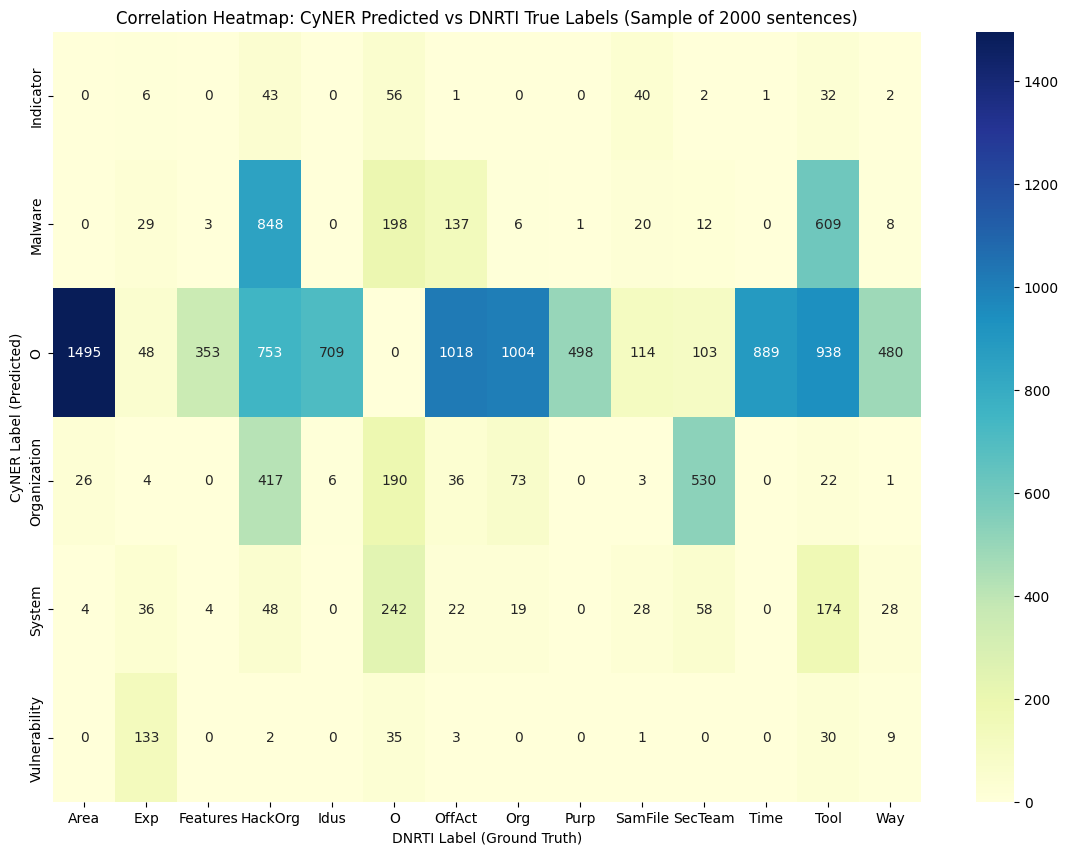

--- Detailed breakdown for CyNER ---

Breakdown for CyNER label 'Malware':
True
HackOrg     848
Tool        609
O           198
OffAct      137
Exp          29
SamFile      20
SecTeam      12
Way           8
Org           6
Features      3
Purp          1
Name: count, dtype: int64
Percentage breakdown:
True
HackOrg     45.323356
Tool        32.549439
O           10.582576
OffAct       7.322288
Exp          1.549973
SamFile      1.068947
SecTeam      0.641368
Way          0.427579
Org          0.320684
Features     0.160342
Purp         0.053447
Name: count, dtype: float64

Breakdown for CyNER label 'Organization':
True
SecTeam    530
HackOrg    417
O          190
Org         73
OffAct      36
Area        26
Tool        22
Idus         6
Exp          4
SamFile      3
Way          1
Name: count, dtype: int64
Percentage breakdown:
True
SecTeam    40.519878
HackOrg    31.880734
O          14.525994
Org         5.581040
OffAct      2.752294
Area        1.987768
Tool        1.681957
Idus    

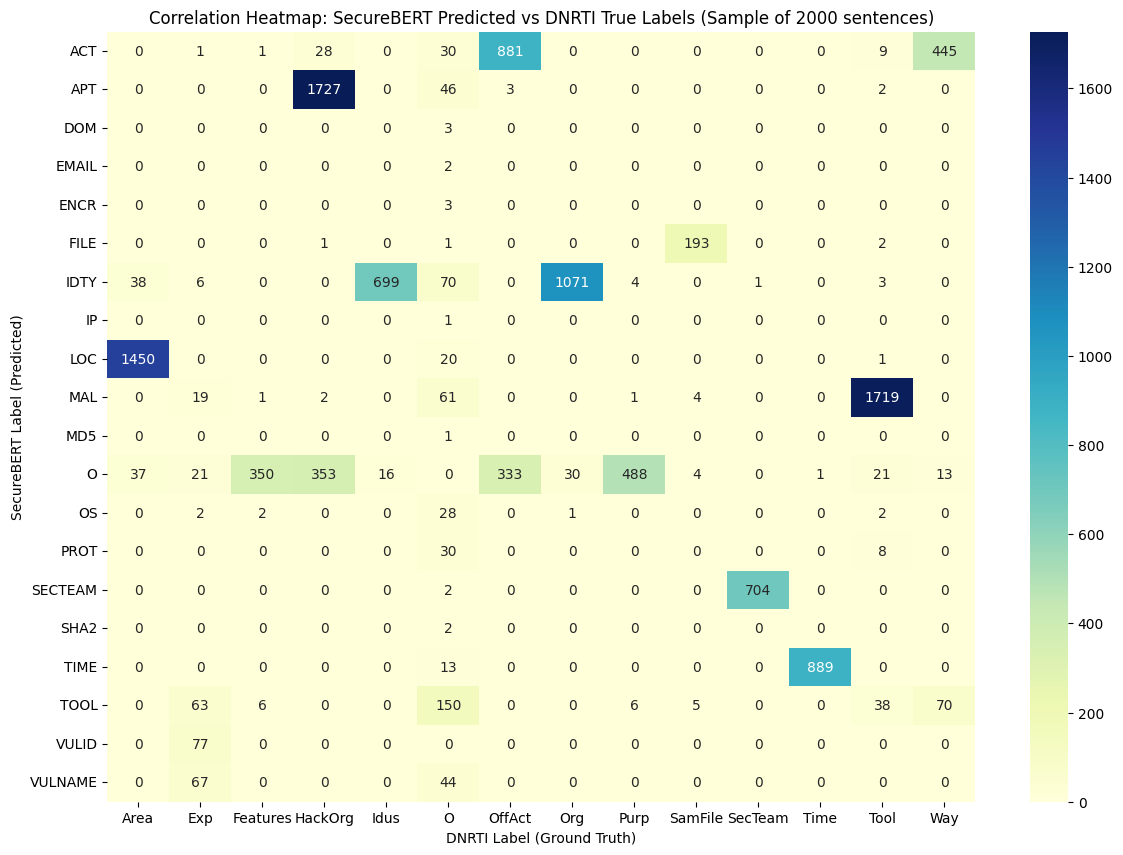

--- Detailed breakdown for SecureBERT ---

Breakdown for SecureBERT label 'IDTY':
True
Org        1071
Idus        699
O            70
Area         38
Exp           6
Purp          4
Tool          3
SecTeam       1
Name: count, dtype: int64
Percentage breakdown:
True
Org        56.606765
Idus       36.945032
O           3.699789
Area        2.008457
Exp         0.317125
Purp        0.211416
Tool        0.158562
SecTeam     0.052854
Name: count, dtype: float64

Breakdown for SecureBERT label 'MAL':
True
Tool        1719
O             61
Exp           19
SamFile        4
HackOrg        2
Features       1
Purp           1
Name: count, dtype: int64
Percentage breakdown:
True
Tool        95.130050
O            3.375761
Exp          1.051467
SamFile      0.221361
HackOrg      0.110681
Features     0.055340
Purp         0.055340
Name: count, dtype: float64

Breakdown for SecureBERT label 'APT':
True
HackOrg    1727
O            46
OffAct        3
Tool          2
Name: count, dtype: int64
Perc

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def analyze_model_results(model_name):
    csv_file = f"label_correlation_{model_name.lower()}.csv"
    if not os.path.exists(csv_file):
        print(f"Results for {model_name} not found at {csv_file}. Please run 'python analyze_labels.py' first.")
        return
    
    # Load the results generated by the background script
    df_corr = pd.read_csv(csv_file)
    
    # Filter out 'O' to see entity correlations more clearly
    df_entities = df_corr[(df_corr['Predicted'] != 'O') | (df_corr['True'] != 'O')]
    
    # Create heatmap data
    matrix = pd.crosstab(df_entities['Predicted'], df_entities['True'])
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Correlation Heatmap: {model_name} Predicted vs DNRTI True Labels (Sample of 2000 sentences)")
    plt.xlabel("DNRTI Label (Ground Truth)")
    plt.ylabel(f"{model_name} Label (Predicted)")
    plt.savefig(f"heatmap_{model_name.lower()}.png", bbox_inches='tight')
    plt.show()
    
    print(f"--- Detailed breakdown for {model_name} ---")
    
    # Top labels predicted by the model
    top_preds = df_corr[df_corr['Predicted'] != 'O']['Predicted'].value_counts()
    for pred_label in top_preds.index:
        print(f"\nBreakdown for {model_name} label '{pred_label}':")
        breakdown = df_corr[df_corr['Predicted'] == pred_label]['True'].value_counts()
        print(breakdown)
        print(f"Percentage breakdown:")
        print(breakdown / breakdown.sum() * 100)
    
    print(f"\n--- DNRTI labels missed by {model_name} (Predicted 'O', but DNRTI had entity) ---")
    missed_labels = df_corr[(df_corr['Predicted'] == 'O') & (df_corr['True'] != 'O')]['True'].value_counts()
    print(missed_labels)

# Analyze both models
analyze_model_results("CyNER")
print("\n" + "="*50 + "\n")
analyze_model_results("SecureBERT")